<a href="https://colab.research.google.com/github/ArminD93/cost_livning_dataset/blob/dev/Cost_living_other.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/Cost_living/'
%run Cost_living_configuration.ipynb

/content/drive/My Drive/ColabNotebooks/Cost_living


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 162 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(2)
memory usage: 64.1 KB


In [2]:
# Utworzenie obiektu data frame, gdzie będą przechowywane informacje o zarobkach, opłatach za internet, kino, telfon, tenis, fitness:
other = df_transponed['other']

DistributionObj = Distribution(other)
CorrelationObj = Correlation(dataset=other)


other.head()

Unnamed: 0                                        1minOfPrepaidMobileTariffLocal  ...  Tennis_Court_Rent_1HourWeekend
Region          Country            City                                           ...                                
Caribbean       Dominican Republic Santo Domingo                            0.15  ...                           13.09
Central America Costa Rica         San Jose                                 0.06  ...                           24.90
                Mexico             Guadalajara                              0.06  ...                            9.71
                                   Mexico City                              0.06  ...                           16.17
                                   Monterrey                                0.05  ...                           10.37

[5 rows x 6 columns]

In [3]:
other.index

MultiIndex([(      'Caribbean', 'Dominican Republic', 'Santo Domingo'),
            ('Central America',         'Costa Rica',      'San Jose'),
            ('Central America',             'Mexico',   'Guadalajara'),
            ('Central America',             'Mexico',   'Mexico City'),
            ('Central America',             'Mexico',     'Monterrey'),
            ('Central America',             'Panama',   'Panama City'),
            (   'Central Asia',         'Kazakhstan',        'Almaty'),
            ( 'Eastern Africa',              'Kenya',       'Nairobi'),
            (   'Eastern Asia',              'China',       'Beijing'),
            (   'Eastern Asia',              'China',      'Shanghai'),
            ...
            ( 'Western Europe',             'France',         'Paris'),
            ( 'Western Europe',            'Germany',        'Berlin'),
            ( 'Western Europe',            'Germany',     'Frankfurt'),
            ( 'Western Europe',            'Germ

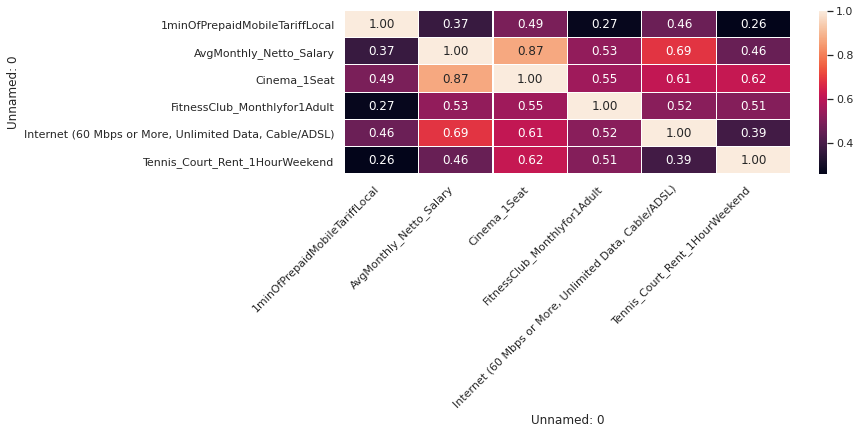

In [4]:
CorrelationObj.addCorrelationmap(10, 3)

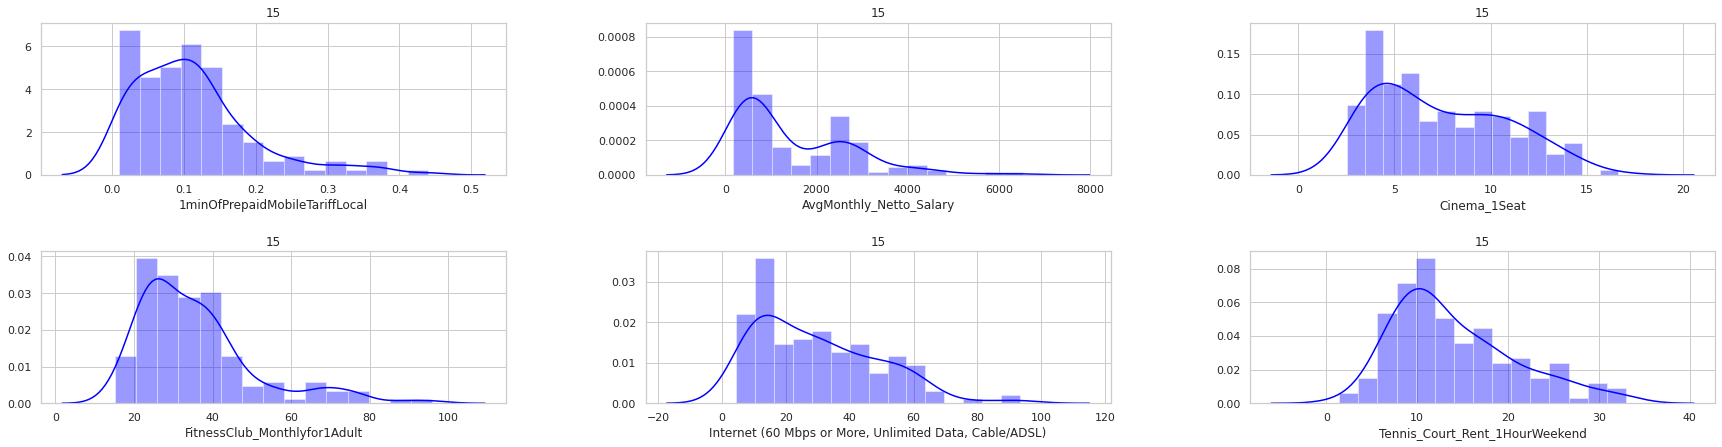

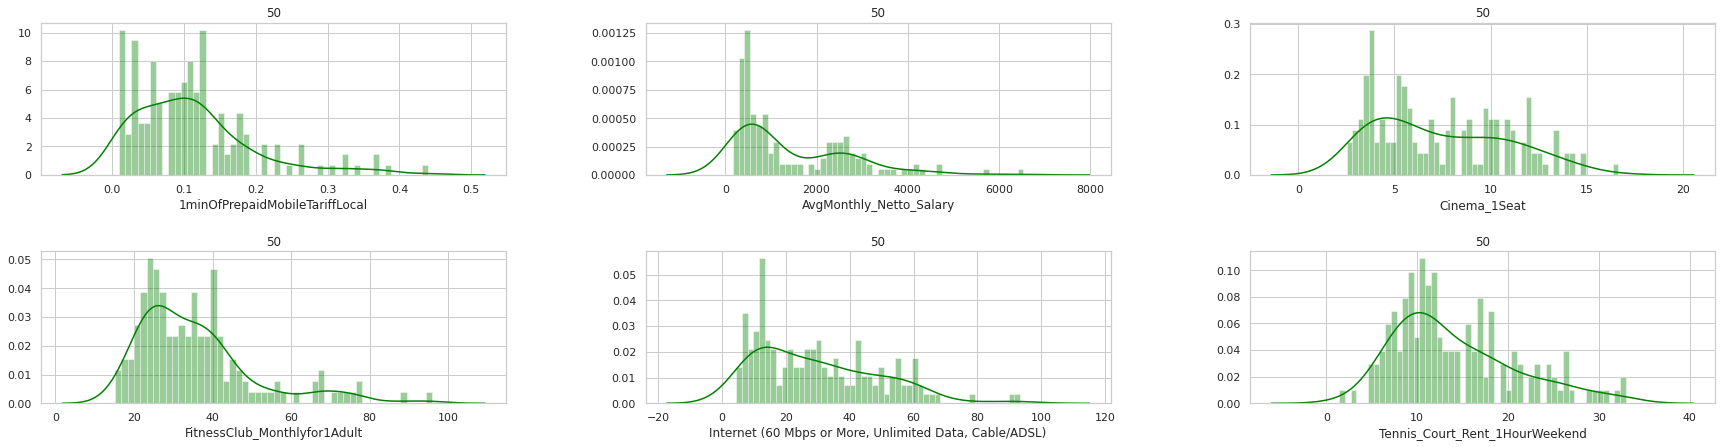

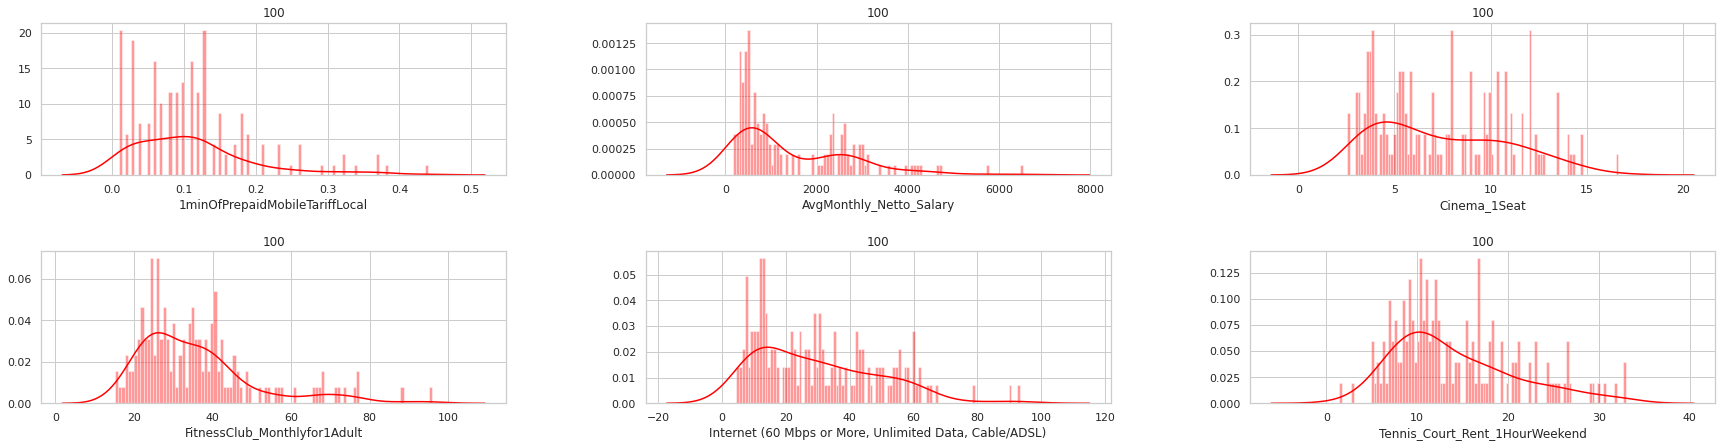

In [5]:
def create_histogram(set_bins, set_color):

  col_names = other.columns
  fig = plt.figure(figsize=(30, 7))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)

  rows= 2
  cols= 3
  col_idx = 0

  for i in range(1, 7):
    fig.add_subplot(rows, cols, i) 
    g = sns.distplot(other[col_names[col_idx]], bins=set_bins, color=set_color)
    g.set(title= set_bins)
    col_idx += 1

  plt.show()


create_histogram(set_bins = 15, set_color = 'blue')
create_histogram(set_bins = 50, set_color = 'green')
create_histogram(set_bins = 100, set_color = 'red')

In [0]:
other.reset_index(inplace=True)
other.set_index(['Country'],inplace=True)

In [0]:
other.reset_index(inplace=True)
other.set_index(['Region'],inplace=True)

In [8]:
other.index

Index(['Caribbean', 'Central America', 'Central America', 'Central America',
       'Central America', 'Central America', 'Central Asia', 'Eastern Africa',
       'Eastern Asia', 'Eastern Asia',
       ...
       'Western Europe', 'Western Europe', 'Western Europe', 'Western Europe',
       'Western Europe', 'Western Europe', 'Western Europe', 'Western Europe',
       'Western Europe', 'Western Europe'],
      dtype='object', name='Region', length=160)

Text(0.5, 1.0, 'AvgMonthly_Netto_Salary')

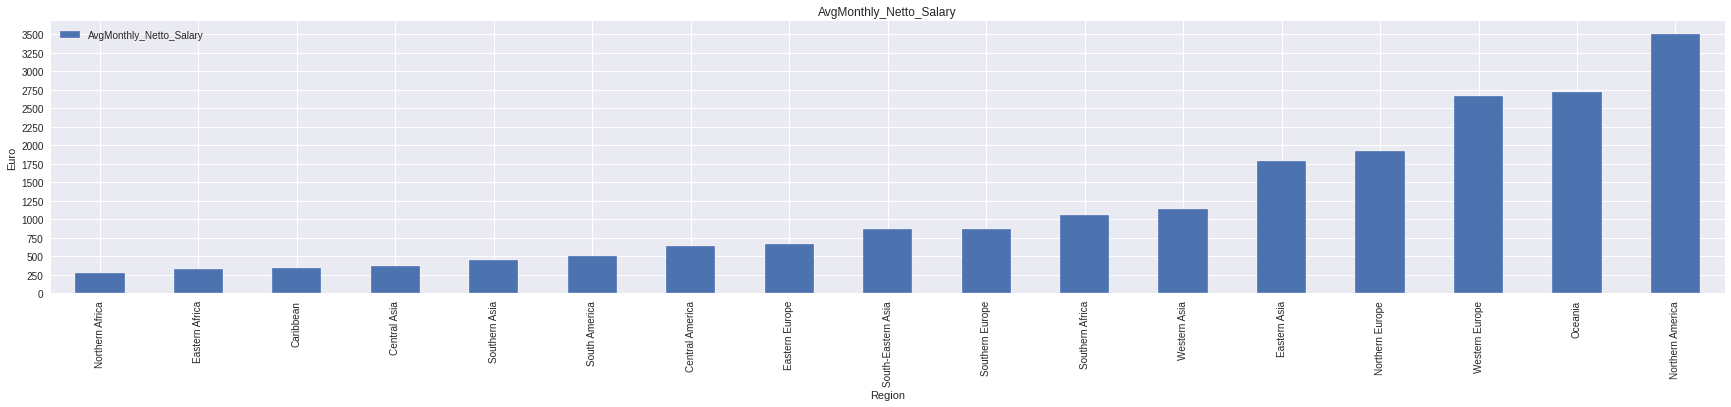

In [9]:
other_groups = other.groupby(by='Region')

AvgMonthly_Netto_Salary_mean = other_groups.agg({'AvgMonthly_Netto_Salary' : 'mean'})

# Posortowanie wartości:
AvgMonthly_Netto_Salary_mean.sort_values(by='AvgMonthly_Netto_Salary', inplace=True)

plt.style.use('seaborn')

AvgMonthly_Netto_Salary_mean.plot(figsize=(30,5), kind ='bar')
plt.yticks(np.arange(0, 3600, step=250))
plt.ylabel('Euro')
plt.title('AvgMonthly_Netto_Salary')

In [10]:
other.index

Index(['Caribbean', 'Central America', 'Central America', 'Central America',
       'Central America', 'Central America', 'Central Asia', 'Eastern Africa',
       'Eastern Asia', 'Eastern Asia',
       ...
       'Western Europe', 'Western Europe', 'Western Europe', 'Western Europe',
       'Western Europe', 'Western Europe', 'Western Europe', 'Western Europe',
       'Western Europe', 'Western Europe'],
      dtype='object', name='Region', length=160)

In [11]:
other_country_groups = other.groupby(by='Region')
AvgMonthly_Netto_Salary_mean = other_country_groups.agg({'AvgMonthly_Netto_Salary' : 'mean'})

# Posortowanie wartości:
AvgMonthly_Netto_Salary_mean.sort_values(by='AvgMonthly_Netto_Salary', inplace=True)

AvgMonthly_Netto_Salary_mean.reset_index(inplace=True)

AvgMonthly_Netto_Salary_mean.head()

,Region,AvgMonthly_Netto_Salary
0,Northern Africa,269.282500
1,Eastern Africa,327.850000
2,Caribbean,335.330000
3,Central Asia,374.420000
4,Southern Asia,442.175385


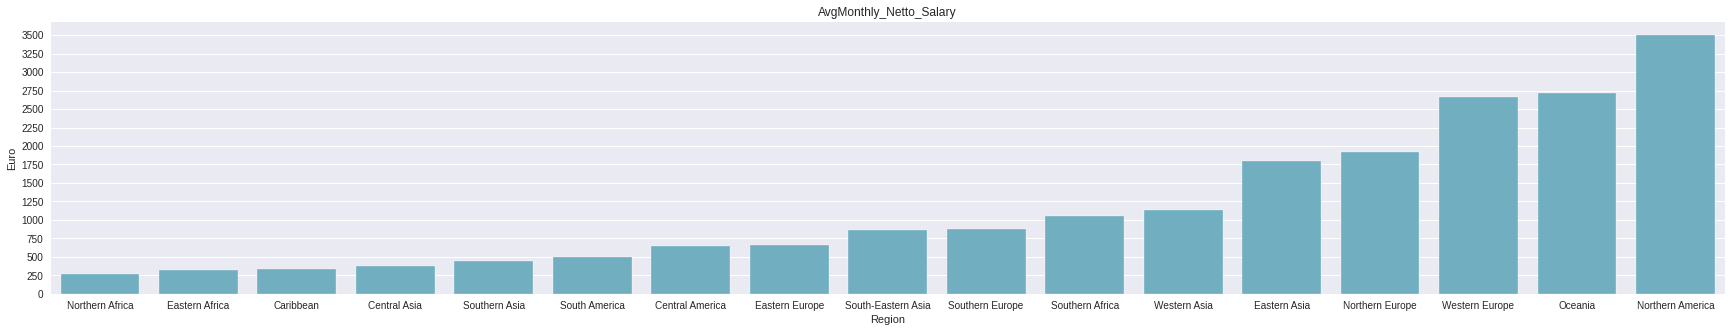

In [12]:
x_data= 'Region'
y_data= 'AvgMonthly_Netto_Salary'

plt.figure(figsize=(30,5))
plt.yticks(np.arange(0, 3600, step=250))

ax = sns.barplot(
    data=AvgMonthly_Netto_Salary_mean,
    x=x_data, 
    y=y_data,
    color='c'  
    )
ax.set(xlabel='Region',
       ylabel='Euro',
       title='AvgMonthly_Netto_Salary' )

plt.show()

In [13]:
other.index

Index(['Caribbean', 'Central America', 'Central America', 'Central America',
       'Central America', 'Central America', 'Central Asia', 'Eastern Africa',
       'Eastern Asia', 'Eastern Asia',
       ...
       'Western Europe', 'Western Europe', 'Western Europe', 'Western Europe',
       'Western Europe', 'Western Europe', 'Western Europe', 'Western Europe',
       'Western Europe', 'Western Europe'],
      dtype='object', name='Region', length=160)

In [14]:
other.reset_index(inplace=True)
other.set_index(['Country','City'],inplace=True)
other.head()

Unnamed: 0                                 Region  ...  Tennis_Court_Rent_1HourWeekend
Country            City                            ...                                
Dominican Republic Santo Domingo        Caribbean  ...                           13.09
Costa Rica         San Jose       Central America  ...                           24.90
Mexico             Guadalajara    Central America  ...                            9.71
                   Mexico City    Central America  ...                           16.17
                   Monterrey      Central America  ...                           10.37

[5 rows x 7 columns]

In [15]:
salary_netto_avg = other['AvgMonthly_Netto_Salary']
salary_netto_avg.head()

Country             City         
Dominican Republic  Santo Domingo    335.33
Costa Rica          San Jose         708.44
Mexico              Guadalajara      498.68
                    Mexico City      596.30
                    Monterrey        695.46
Name: AvgMonthly_Netto_Salary, dtype: float64

In [16]:
salary_netto_avg['Poland'].sort_values(ascending=False)

City
Warsaw             979.42
Gdansk             865.09
Krakow (Cracow)    855.87
Wroclaw            848.11
Poznan             791.94
Lodz               689.44
Name: AvgMonthly_Netto_Salary, dtype: float64

In [17]:
other_regions= other[['Region', '1minOfPrepaidMobileTariffLocal', 'AvgMonthly_Netto_Salary', 'Cinema_1Seat', 'FitnessClub_Monthlyfor1Adult', 'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)', 'Tennis_Court_Rent_1HourWeekend']]


other_regions.set_index('Region', inplace=True)
other_regions.head()

Unnamed: 0,1minOfPrepaidMobileTariffLocal,AvgMonthly_Netto_Salary,Cinema_1Seat,FitnessClub_Monthlyfor1Adult,"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)",Tennis_Court_Rent_1HourWeekend
Region,,,,,,
Caribbean,0.15,335.33,5.10,22.49,50.03,13.09
Central America,0.06,708.44,5.50,53.68,65.30,24.90
Central America,0.06,498.68,3.58,24.59,27.53,9.71
Central America,0.06,596.30,3.82,49.56,26.34,16.17
Central America,0.05,695.46,3.59,34.28,25.84,10.37


In [18]:
# Pogrupowanie danych
other_regions = other_regions.groupby(by='Region')

other_regions_mean = other_regions.agg(
                                                {
                                                  '1minOfPrepaidMobileTariffLocal'                              : 'mean',
                                                  'AvgMonthly_Netto_Salary'                                     : 'mean',
                                                  'Cinema_1Seat'                                                : 'mean',    
                                                  'FitnessClub_Monthlyfor1Adult'                                : 'mean',           
                                                  'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)'      : 'mean',    
                                                  'Tennis_Court_Rent_1HourWeekend'                              : 'mean',                                                                          
                                                 }
                                               )

# Posortowanie wartości
other_regions_mean = other_regions_mean.sort_values(
                                                    by=[
                                                        '1minOfPrepaidMobileTariffLocal', 'AvgMonthly_Netto_Salary', 'Cinema_1Seat',
                                                        'FitnessClub_Monthlyfor1Adult', 'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
                                                        'Tennis_Court_Rent_1HourWeekend'
                                                        ]
                                                    )

other_regions_mean.head()

,1minOfPrepaidMobileTariffLocal,AvgMonthly_Netto_Salary,Cinema_1Seat,FitnessClub_Monthlyfor1Adult,"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)",Tennis_Court_Rent_1HourWeekend
Region,,,,,,
Southern Asia,0.010769,442.175385,3.404615,20.046923,11.109231,7.110000
Eastern Africa,0.030000,327.850000,7.090000,45.400000,51.910000,6.810000
Central Asia,0.030000,374.420000,3.580000,39.410000,10.470000,9.430000
Northern Africa,0.052500,269.282500,4.247500,23.090000,20.000000,9.165000
Eastern Europe,0.063214,663.216071,5.518571,27.132857,11.063214,12.092143


In [19]:
other_regions_mean['mean'] = other_regions_mean.sum(axis=1)
other_regions_mean = other_regions_mean.sort_values(by= 'mean')
other_regions_mean.drop('mean', axis=1, inplace=True)

other_regions_mean.head()

,1minOfPrepaidMobileTariffLocal,AvgMonthly_Netto_Salary,Cinema_1Seat,FitnessClub_Monthlyfor1Adult,"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)",Tennis_Court_Rent_1HourWeekend
Region,,,,,,
Northern Africa,0.052500,269.282500,4.247500,23.090000,20.000000,9.165
Caribbean,0.150000,335.330000,5.100000,22.490000,50.030000,13.090
Central Asia,0.030000,374.420000,3.580000,39.410000,10.470000,9.430
Eastern Africa,0.030000,327.850000,7.090000,45.400000,51.910000,6.810
Southern Asia,0.010769,442.175385,3.404615,20.046923,11.109231,7.110


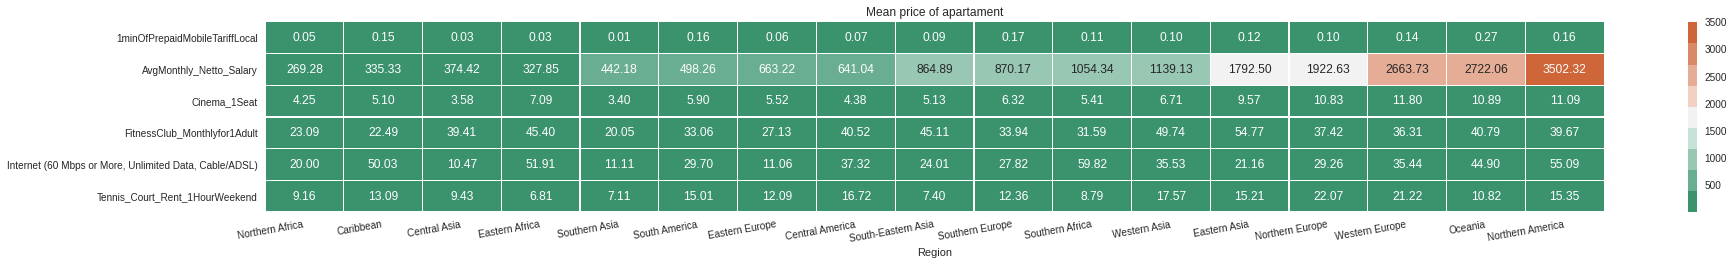

In [20]:
plt.figure(figsize=(30, 3.5))

g = sns.heatmap(other_regions_mean.T, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(150, 385, s=80, l=55, n=9) )
g.set( title= 'Mean price of apartament')
g.set_ylabel('')  
g.set_xticklabels( g.get_xticklabels(), rotation=10,  horizontalalignment='right' )


plt.show()